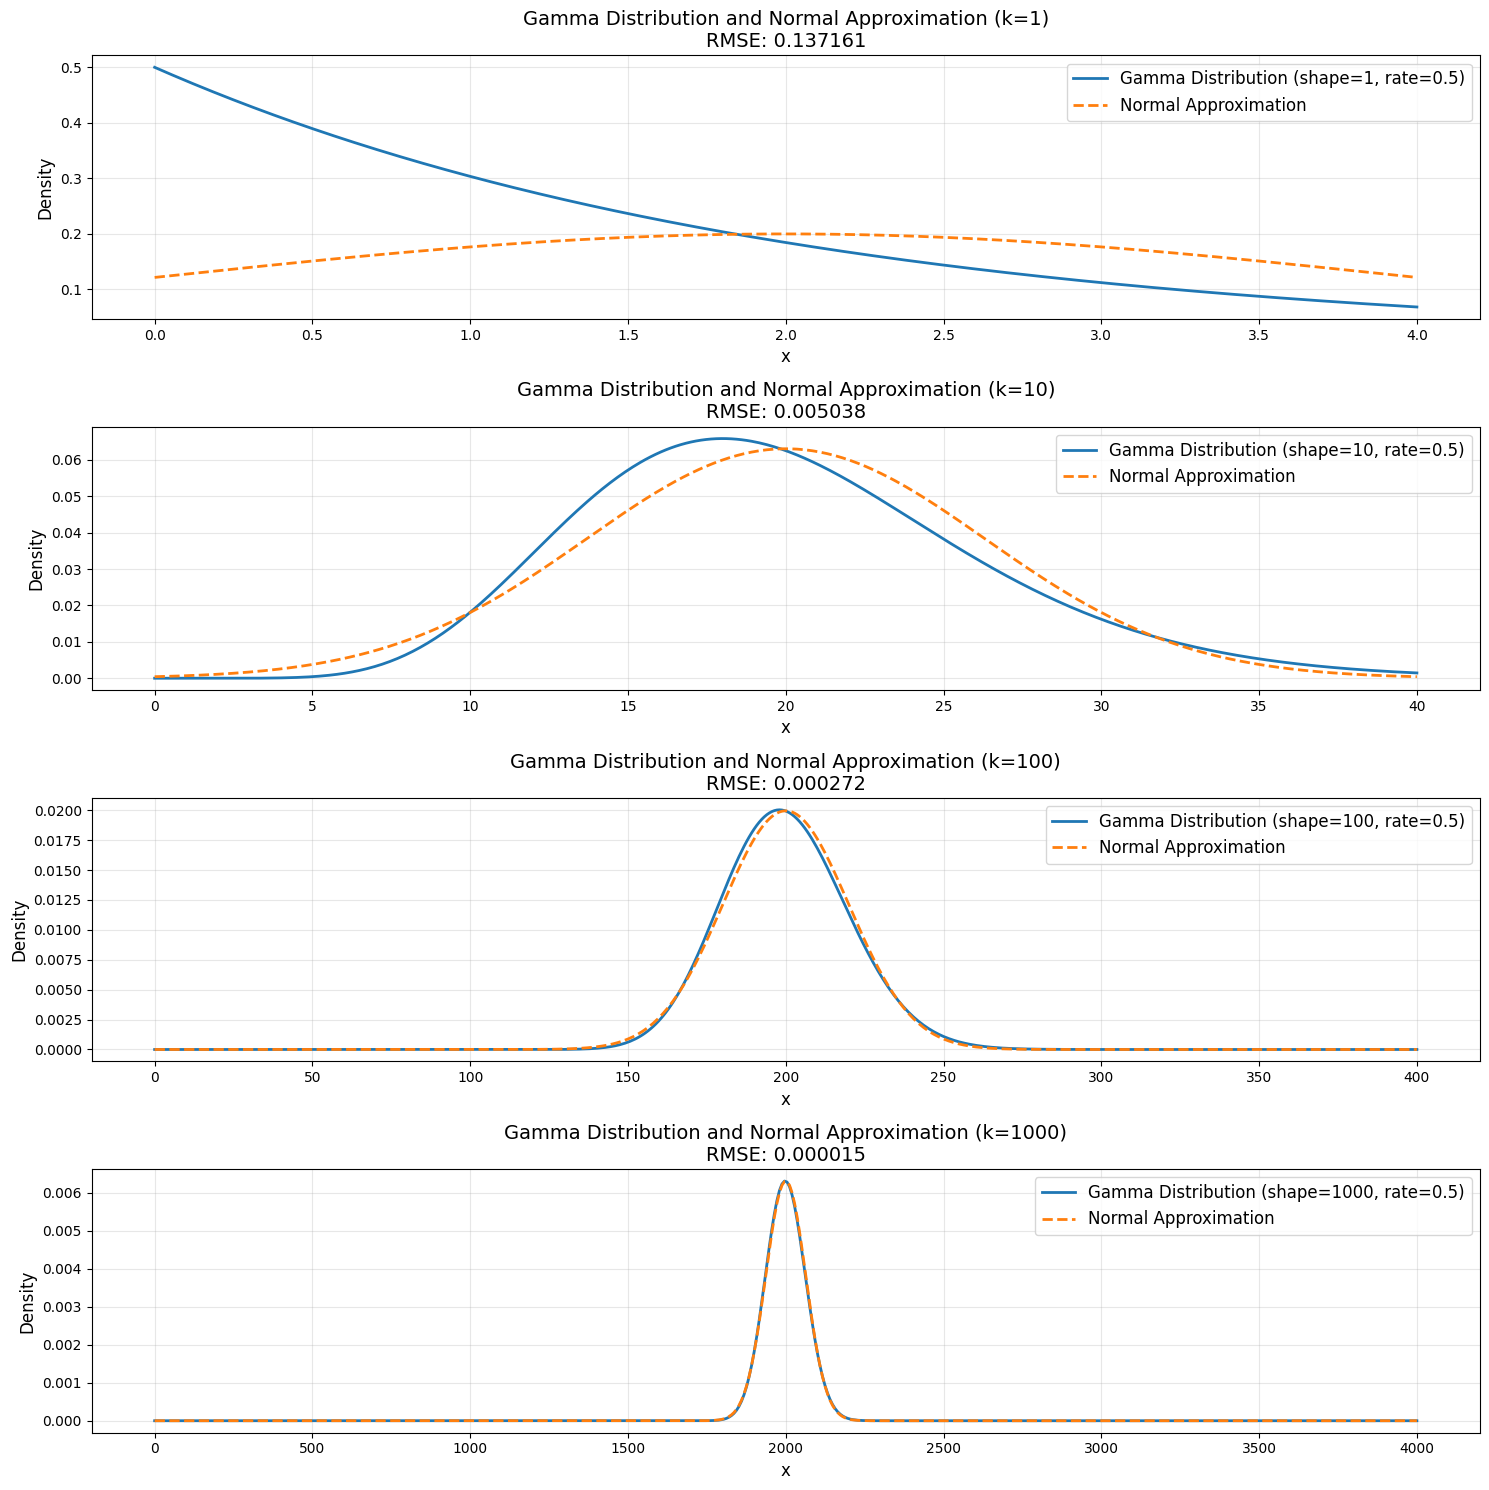

   Shape (k)      RMSE
0          1  0.137161
1         10  0.005038
2        100  0.000272
3       1000  0.000015


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm
from sklearn.metrics import mean_squared_error
import pandas as pd

# RMSE 계산 함수
def calculate_rmse(gamma_pdf, normal_pdf):
    return np.sqrt(mean_squared_error(gamma_pdf, normal_pdf))

# 감마 분포와 정규 근사 비교를 위한 다양한 k값 설정
k_values = [1, 10, 100, 1000]  # 다양한 shape 값
rate = 0.5  # 고정된 rate
scale = 1 / rate  # θ 계산
rmse_values = []

plt.figure(figsize=(15, 15))  # 그래프 크기 설정

for i, k in enumerate(k_values):
    # 감마 분포 데이터 생성
    scale = 1 / rate  # scale은 rate의 역수
    x = np.linspace(0, k * 4, 500)  # x 범위 설정, k에 비례해 늘림
    gamma_pdf = gamma.pdf(x, a=k, scale=scale)  # 감마 분포 PDF 계산

    # 정규 분포 근사 데이터 생성
    mean = k * scale  # 평균 = shape * scale
    std = np.sqrt(k * scale**2)  # 표준편차 = sqrt(shape * scale^2)
    normal_pdf = norm.pdf(x, loc=mean, scale=std)  # 정규 분포 PDF 계산

    # RMSE 계산
    rmse = calculate_rmse(gamma_pdf, normal_pdf)
    rmse_values.append((k, rmse))

    # 서브플롯 생성
    plt.subplot(4, 1, i + 1)  # 4개의 행과 1개의 열, i+1번째 그래프
    plt.plot(x, gamma_pdf, label=f'Gamma Distribution (shape={k}, rate={rate})', lw=2)
    plt.plot(x, normal_pdf, label='Normal Approximation', lw=2, linestyle='--')
    plt.title(f'Gamma Distribution and Normal Approximation (k={k})\nRMSE: {rmse:.6f}', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()  # 그래프 간격 조정
plt.show()

# RMSE 값을 표로 출력
rmse_df = pd.DataFrame(rmse_values, columns=["Shape (k)", "RMSE"])
print(rmse_df)


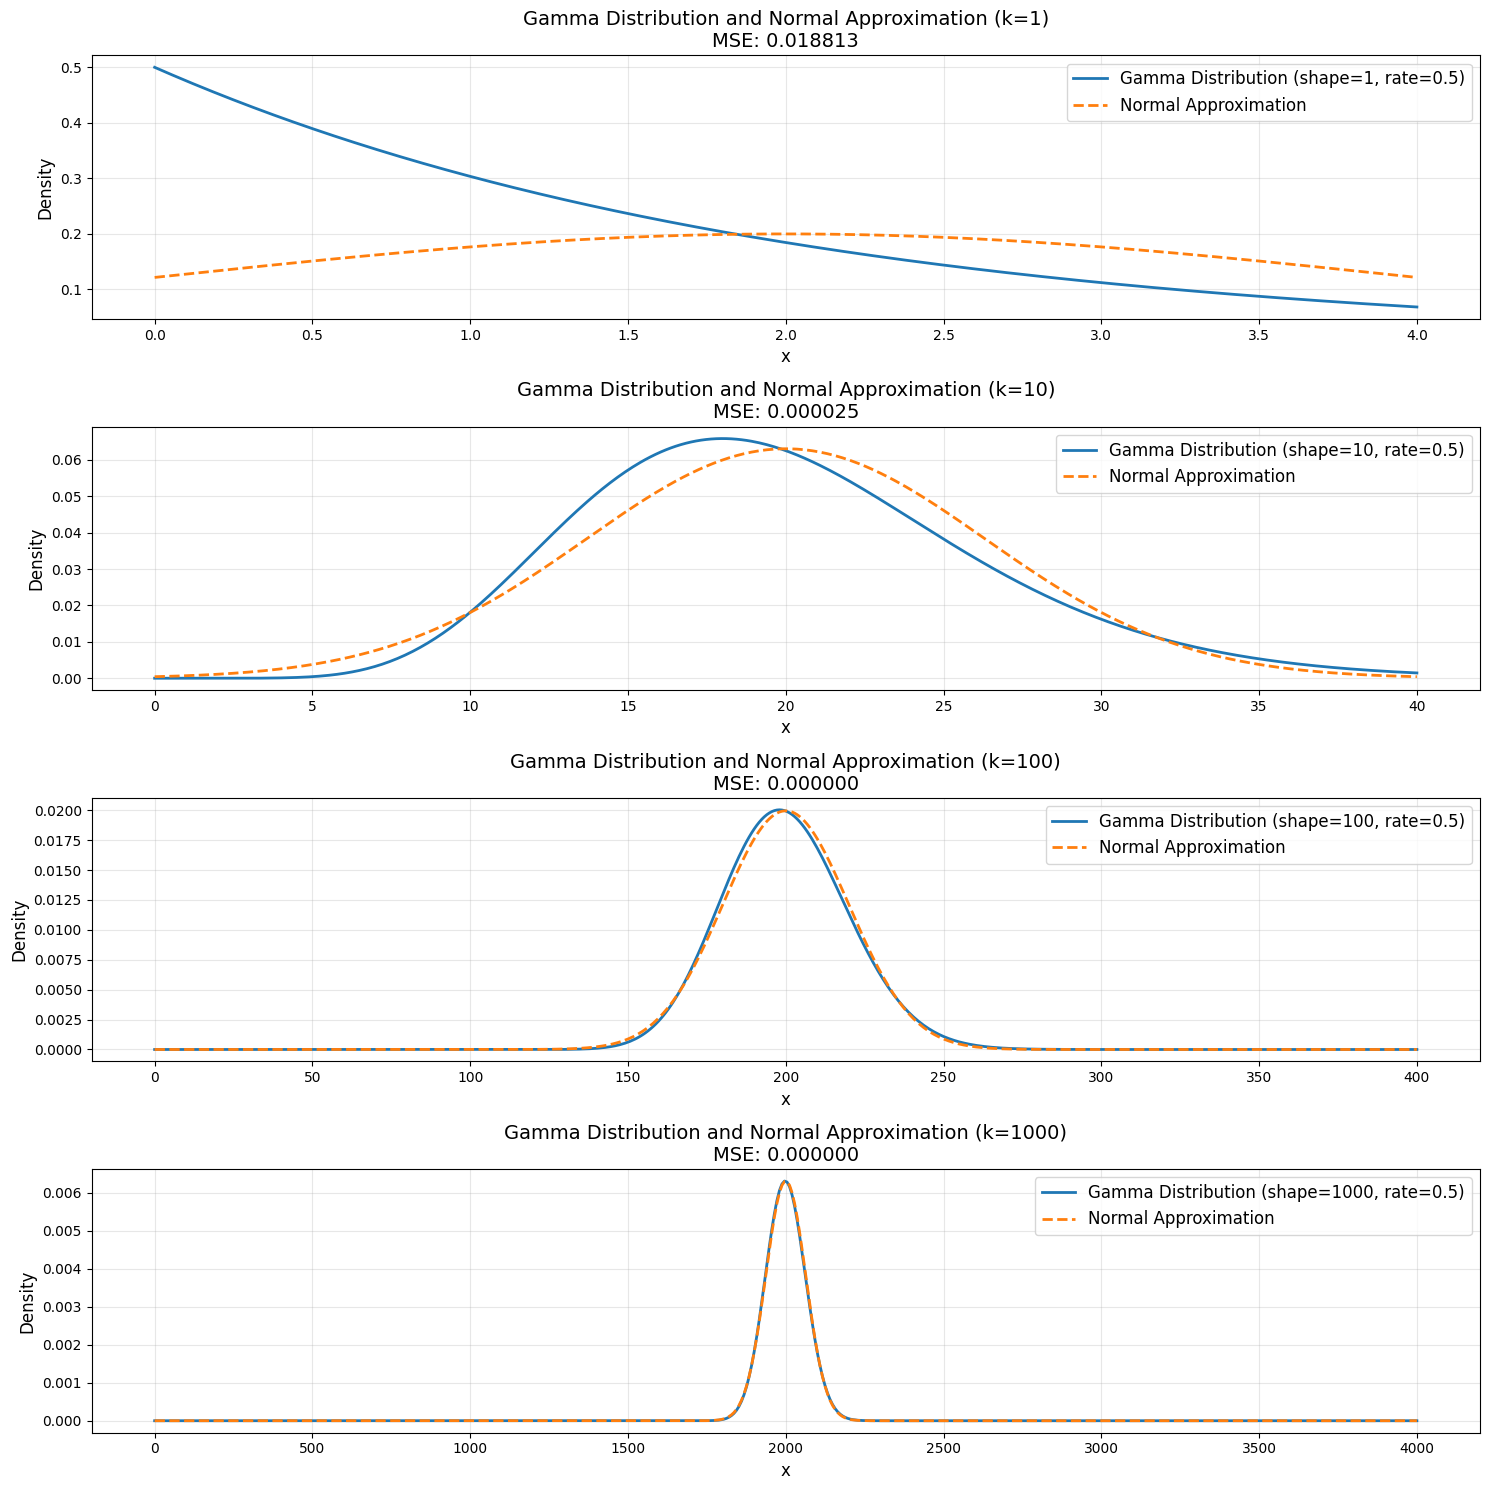

   Shape (k)           MSE
0          1  1.881319e-02
1         10  2.538122e-05
2        100  7.398314e-08
3       1000  2.320530e-10


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm
from sklearn.metrics import mean_squared_error
import pandas as pd

# MSE 계산 함수
def calculate_mse(gamma_pdf, normal_pdf):
    return mean_squared_error(gamma_pdf, normal_pdf)

# 감마 분포와 정규 근사 비교를 위한 다양한 k값 설정
k_values = [1, 10, 100, 1000]  # 다양한 shape 값
rate = 0.5  # 고정된 rate
scale = 1 / rate  # θ 계산
mse_values = []

plt.figure(figsize=(15, 15))  # 그래프 크기 설정

for i, k in enumerate(k_values):
    # 감마 분포 데이터 생성
    scale = 1 / rate  # scale은 rate의 역수
    x = np.linspace(0, k * 4, 500)  # x 범위 설정, k에 비례해 늘림
    gamma_pdf = gamma.pdf(x, a=k, scale=scale)  # 감마 분포 PDF 계산

    # 정규 분포 근사 데이터 생성
    mean = k * scale  # 평균 = shape * scale
    std = np.sqrt(k * scale**2)  # 표준편차 = sqrt(shape * scale^2)
    normal_pdf = norm.pdf(x, loc=mean, scale=std)  # 정규 분포 PDF 계산

    # MSE 계산
    mse = calculate_mse(gamma_pdf, normal_pdf)
    mse_values.append((k, mse))

    # 서브플롯 생성
    plt.subplot(4, 1, i + 1)  # 4개의 행과 1개의 열, i+1번째 그래프
    plt.plot(x, gamma_pdf, label=f'Gamma Distribution (shape={k}, rate={rate})', lw=2)
    plt.plot(x, normal_pdf, label='Normal Approximation', lw=2, linestyle='--')
    plt.title(f'Gamma Distribution and Normal Approximation (k={k})\nMSE: {mse:.6f}', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()  # 그래프 간격 조정
plt.show()

# MSE 값을 표로 출력
mse_df = pd.DataFrame(mse_values, columns=["Shape (k)", "MSE"])
print(mse_df)
